<a href="https://colab.research.google.com/github/OkadaNorihide/utilcase/blob/main/WS_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 事前準備

In [ ]:
# WSで利用するファイルのダウンロード
!wget -O train.csv https://drive.google.com/uc?id=1bJjDaEjRkQpUX_wFMdkAYjU1kDXDlO3m

--2022-02-04 00:30:58--  https://drive.google.com/uc?id=1bJjDaEjRkQpUX_wFMdkAYjU1kDXDlO3m
Resolving drive.google.com (drive.google.com)... 108.177.97.138, 108.177.97.113, 108.177.97.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r745tmp6n97qfkl0m178q2frfrjpnv5v/1643934600000/08554479401840081137/*/1bJjDaEjRkQpUX_wFMdkAYjU1kDXDlO3m [following]
--2022-02-04 00:31:00--  https://doc-00-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r745tmp6n97qfkl0m178q2frfrjpnv5v/1643934600000/08554479401840081137/*/1bJjDaEjRkQpUX_wFMdkAYjU1kDXDlO3m
Resolving doc-00-bg-docs.googleusercontent.com (doc-00-bg-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-00-bg-docs.googleusercontent.com (doc-00-bg-docs.googleusercontent.com)|142.2

In [ ]:
# ライブラリのインポート
import pandas as pd
import seaborn as sns
import time
from IPython.display import display, HTML

# 変数の設定
save_path = 'autogluon_workshop'
metric= "log_loss"

## ライブラリのインストール
ライブラリのインストールはOS環境ごとにここから選んでください
https://auto.gluon.ai/stable/index.html

In [ ]:
! python3 -m pip install -U pip
! python3 -m pip install -U setuptools wheel
! python3 -m pip install -U "mxnet_cu101<2.0.0"
! python3 -m pip install autogluon bokeh

     |████████████████████████████████| 2.1 MB 4.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.1/358.1 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## データセット

### データ出典
nishika 「小説家になろうコンペ」
https://www.nishika.com/competitions/21/summary
20カラム, 4万行

In [ ]:
from autogluon.tabular import TabularPredictor, TabularDataset

In [ ]:
# データの読み込みはTabular Datasetを利用すると便利。実質的にpandasのDataFrameと同じ。
train_df = TabularDataset('train.csv') # 配布方法考える
train_df.head(2)

,ncode,general_firstup,title,story,keyword,userid,writer,biggenre,genre,novel_type,end,isstop,isr15,isbl,isgl,iszankoku,istensei,istenni,pc_or_k,fav_novel_cnt_bin
0,N7588B,2007-04-01 16:40:57,暗い窓辺と皇帝の北の宮,※新しく手直ししました。\n\nhttp://ncode.syosetu.com/n2539...,ファンタジー SF 天使 小人 猫,9904,梅田浩志,4,402,1,0,0,0,0,0,0,0,0,0,1
1,N8726B,2007-04-22 15:40:30,仮想現実ゲーム 『ヴァルハラ』,ゲームセンターの片隅に置かれた律儀なまでにリアルなゲーム、ヴァルハラ。それはプレイを重ねるた...,仮想現実 ゲーム バトル 戦乙女 高校生 学校/学園 アンドロイド ライト SF エンターテ...,6527,ルト,4,401,1,0,0,0,0,0,0,0,0,3,2


In [ ]:
train_df.columns

Index(['ncode', 'general_firstup', 'title', 'story', 'keyword', 'userid',
       'writer', 'biggenre', 'genre', 'novel_type', 'end', 'isstop', 'isr15',
       'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k',
       'fav_novel_cnt_bin'],
      dtype='object')

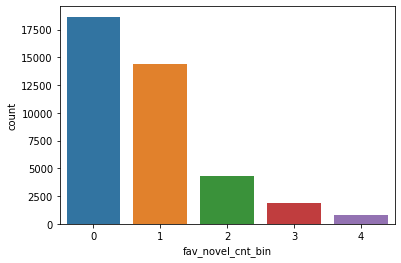

In [ ]:
# 学習に使用するラベルを設定する。0~4のカテゴリが設定されている。
label = 'fav_novel_cnt_bin'
sns.countplot(x=label, data=train_df)

# 学習編

* 必須変数
    * label:学習データの中でラベル付けしたカラム
* 主なオプション
    * path :学習したデータを保管するパス
    * time_limit: 学習にかける時間［s］
    * verbosity: ログの通知のレベル
    * presets: 学習のクオリティ設定
    * eval_metric: 評価指標
    * problem_type: 回帰、分類、多クラス分類か選択 

ある特定の列の推定を残りの列を用いて行うような問題設定では、`fit()`関数を使用することで簡単に推定結果を得ることができるようになる。

In [ ]:
metric = 'log_loss'

In [ ]:
%%time
#autoGluonに必要なコードはこの2行だけ！！
from autogluon.tabular import TabularPredictor 
predictor = TabularPredictor(label=label, path=save_path).fit(train_df, time_limit=60)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "autogluon_workshop/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 2, 3, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12404.08 MB
	Train Data (Original)  Memory Usage: 37.93 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerato

CPU times: user 1min 11s, sys: 6.72 s, total: 1min 18s
Wall time: 1min 32s


AutoGluonがデータセット中の推定カラムの情報から問題設定のタイプを推定してくれる。実際の問題設定と異なる場合には指定必須。

```
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
```


学習した内容のサマリを確認することが出来る。
この際にHTMLファイルが保存されるので、その中身を確認してもよい。

In [ ]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.5644       0.217307  1.780046                0.000739           0.277794            2       True          3
1       KNeighborsDist     0.5568       0.107534  0.760913                0.107534           0.760913            1       True          2
2       KNeighborsUnif     0.5364       0.109034  0.741339                0.109034           0.741339            1       True          1
Number of models trained: 3
Types of models trained:
{'KNNModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])                    :    2 | ['title', 'writer']
('category', ['text_as_category'])  :    2 | ['story', 'keyword']
('int', [])                         :    4 | [

autogluon_workshop/SummaryOfModels.html のファイルをDLして開いてみて、どんなモデルができたかを確認してみる

In [ ]:
from IPython.display import display, HTML
HTML(filename='autogluon_workshop/SummaryOfModels.html')

### パス指定していたが何していた？！

→ディスクの中身見てみよう！！

AutoGluonによる前処理済みの学習データ

目的変数込みで20カラムから2040カラムまで増加

In [ ]:
X = pd.read_pickle(f'{save_path}/utils/data/X.pkl')
X

,userid,biggenre,genre,novel_type,isr15,isbl,isgl,iszankoku,istensei,istenni,pc_or_k,title,story,keyword,writer,general_firstup,story.char_count,story.word_count,story.capital_ratio,story.lower_ratio,story.digit_ratio,story.special_ratio,story.symbol_count.!,story.symbol_ratio.!,story.symbol_count.?,story.symbol_ratio.?,story.symbol_count.&,story.symbol_ratio.&,story.symbol_count..,story.symbol_ratio..,story.symbol_count.:,story.symbol_ratio.:,story.symbol_count.,story.symbol_ratio.,story.symbol_count./,story.symbol_ratio./,story.symbol_count.;,story.symbol_ratio.;,story.symbol_count.-,story.symbol_ratio.-,...,__nlp__.青春 異能力バトル,__nlp__.青春 異能力バトル ヒーロー,__nlp__.青春 異能力バトル ラブコメ,__nlp__.青春 異能力バトル 冒険,__nlp__.青春 百合,__nlp__.青春 私小説,__nlp__.青春 私小説 ホームドラマ,__nlp__.青春 近未来,__nlp__.非テンプレ,__nlp__.非デスゲーム,__nlp__.非日常,__nlp__.音楽,__nlp__.願い,__nlp__.食事,__nlp__.飯テロ,__nlp__.騎士,__nlp__.高校,__nlp__.高校生,__nlp__.魔女,__nlp__.魔族,__nlp__.魔法,__nlp__.魔法 ゲーム,__nlp__.魔法 ダンジョン,__nlp__.魔法 チート,__nlp__.魔法 ハッピーエンド,__nlp__.魔法 ファンタジー,__nlp__.魔法 異世界,__nlp__.魔法 超能力,__nlp__.魔法使い,__nlp__.魔法少女,__nlp__.魔物,__nlp__.魔王,__nlp__.魔王 勇者,__nlp__.魔術,__nlp__.魔術師,__nlp__.黒森,__nlp__.ａｉ,__nlp__.ｓｆ,__nlp__.ｖｒｍｍｏ,__nlp__._total_
32141,12136,3,302,0,1,0,0,0,0,0,2,NaN,NaN,NaN,4019,1625497235000000000,6,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
29349,1635704,1,102,0,1,0,1,0,0,0,2,NaN,NaN,NaN,5056,1624222548000000000,6,2,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
39826,1371754,2,201,1,0,0,0,0,0,1,2,NaN,NaN,799,NaN,1628664115000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11589,728483,4,402,1,0,0,0,0,0,0,2,NaN,NaN,NaN,5042,1580554800000000000,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
20473,2034554,3,301,1,0,0,0,0,0,0,2,NaN,NaN,0,1808,1615447312000000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,1294746,4,401,1,0,1,1,0,0,0,2,NaN,NaN,NaN,NaN,1533424904000000000,8,6,7,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
16969,1054237,99,9901,1,0,0,0,0,0,0,2,NaN,NaN,NaN,130,1608164231000000000,7,3,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
32744,1384436,3,302,0,0,0,0,1,0,0,2,NaN,NaN,NaN,144,1625738400000000000,9,8,0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
15845,2039783,4,403,1,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,1603745119000000000,5,3,0,8,3,8,0,0,0,0,0,0,3,8,1,7,0,0,3,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15


カラムの一覧

In [ ]:
X.columns

Index(['userid', 'biggenre', 'genre', 'novel_type', 'isr15', 'isbl', 'isgl',
       'iszankoku', 'istensei', 'istenni',
       ...
       '__nlp__.魔物', '__nlp__.魔王', '__nlp__.魔王 勇者', '__nlp__.魔術',
       '__nlp__.魔術師', '__nlp__.黒森', '__nlp__.ａｉ', '__nlp__.ｓｆ',
       '__nlp__.ｖｒｍｍｏ', '__nlp__._total_'],
      dtype='object', length=2040)

nlp____:CountVectorizerを用いてあらすじとキーワードの頻出単語のカウントを行っている

カテゴリカル変数と文章が前処理されこのように特徴量として使われていた

# 効率化編


## リリース時の効率化
リリース時に学習を効率化させる目的での機能も追加されている

* モデルの重みの変更
    * 重みにL2ノルムをかけることで、不要なパラメータを減らす。追加学習する必要がなく、より少ないモデルの重み付き和で同等の出力を得ようとすることで、推論を軽量化できる。
    * `redictor.fit_weighted_ensemble(expand_pareto_frontier=True)`で実行できる
* refit
    * バギングを使って学習しているものに関して、シングルモデル化することによってファイルの容量を減らしたり、推論の高速化をみこむ（精度は下がる）
* Model distillation
    * アンサンブルされているそれぞれのモデルは、アンサンブルした結果のモデルに対して性能劣化がある。そのためアンサンブルした結果の数値を目標値としてそれぞれのモデルを再度学習させることで、アンサンブルの結果を生かしつつ、シングルモデルの利点も活かしたモデルが得られる。
    * `predictor.distill()`で実行できる



## 学習時の効率化




### presetsの設定

プリセットの設定をすることで上記のrefitやハイパーパラメータの軽量化など様々な設定を一度に行うことができる。一番最初は細々としたパラメータを変更するのではなくて、このプリセットの設定から入ることが推奨されている。

* `best_quality={'auto_stack': True}`
    * 最も性能がいいもの。長い学習時間を許容できるのであればこの設定でやりたい。
* `high_quality_fast_inference_only_refit={'auto_stack': True, 'refit_full': True, 'set_best_to_refit_full': True, '_save_bag_folds': False}`
    * refitをかけることによってbest_qualityに対して10xから200xの推論高速化と小容量化が期待できる。モデルサイズが小さい方がいい場合に指定すると良い。
* `good_quality_faster_inference_only_refit={'auto_stack': True, 'refit_full': True, 'set_best_to_refit_full': True, '_save_bag_folds': False, 'hyperparameters': 'light'}`
    * high_quality_fast_inference_only_refitに対して4倍程度の推論高速化と小容量化が期待できる。高速低容量が要求される場合に推奨される。
* `medium_quality_faster_train={'auto_stack': False}`
    * good_quality_faster_inference_only_refitの20倍推論が早い。**AutoGluonのデフォルト設定**。
* `optimize_for_deployment={'keep_only_best': True, 'save_space': True}`
    * 推論速度の低下などは無いが、学習に必要としないモデルを削除するため、2から4倍のディスク容量の削減になる
* `ignore_text={'_feature_generator_kwargs': {'enable_text_ngram_features': False, 'enable_text_special_features': False, 'enable_raw_text_features': False}}`
    * テキストが検出された場合にテキストを利用した特徴量の作成を行うが、その機能を使わなくする。文章情報がどれだけ結果に寄与しているのかどうかを確認するためにも役に立つ。

In [ ]:
predictor_light = (
    TabularPredictor(
        label=label, 
        eval_metric=metric
    ).fit(
        train_df, 
        presets='good_quality_faster_inference_only_refit', 
        time_limit=60
    )
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220204_002220/"
Presets specified: ['good_quality_faster_inference_only_refit']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220204_002220/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 2, 3, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11176.32 MB
	Train Data (Original)  Memory Usage: 59.55 MB (0.5% of available memory)
	Inferring data type of eac

### hyperparametersの設定

strまたはdictで与える引数で、学習時のモデルのハイパーパラメータ設定を行う。設定値は`['default', 'light', 'very_light', 'toy', 'multimodal'`の5つで`'multimodal'`以外は左から順番に学習時間が短くなり、精度も悪化する。モデルのプロトタイピングには使用できるが、プロダクションでは使えない。


In [ ]:
# 軽量なモデルの学習を行うこともできる。結果学習も早くなる。
predictor_light = (
    TabularPredictor(
        label=label, 
        eval_metric=metric
    ).fit(
        train_df, 
        hyperparameters='very_light', 
        time_limit=60
    )
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220204_002345/"
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220204_002345/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 2, 3, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11339.05 MB
	Train Data (Original)  Memory Usage: 59.55 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to man

### モデルの除外

学習するモデルの除外を行うこともできる。特に学習に時間がかかるけど精度にあまり影響がないKNNモデルなどを除外した場合に学習時間に対する精度の向上が見込まれる。

In [ ]:
excluded_model_types = ['KNN', 'NN']  # 除外したいモデルの指定
predictor_light = (
    TabularPredictor(
        label=label, 
        eval_metric=metric
    ).fit(
        train_df, 
        excluded_model_types=excluded_model_types, 
        time_limit=60
    )
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220204_002448/"
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220204_002448/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 2, 3, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11193.27 MB
	Train Data (Original)  Memory Usage: 59.55 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to man

## ハイパパラメタ最適化（Hyper Parameter Optimization; HPO）編

autogluonでもハイパパラメタの探索はできる。効率的にパラメタを探しながら、どのモデルがいいかを調べることができる

In [ ]:
time_limit = 60  # モデルを1分ぐらい学習させる

predictor = TabularPredictor(label=label, eval_metric=metric).fit(
    train_df, 
    time_limit=time_limit,
    hyperparameter_tune_kwargs="auto",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220204_002551/"
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220204_002551/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 2, 3, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11113.98 MB
	Train Data (Original)  Memory Usage: 59.55 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to man

In [ ]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -0.853620       0.315077  4.317303                0.002443           2.163424            2       True          8
1          LightGBM/T0  -0.873195       0.096112  2.056905                0.096112           2.056905            1       True          4
2        LightGBMXT/T0  -0.904797       0.109620  2.074088                0.109620           2.074088            1       True          3
3        LightGBMLarge  -0.982393       0.092580  3.202636                0.092580           3.202636            1       True          7
4           XGBoost/T0  -0.987972       0.084637  2.836012                0.084637           2.836012            1       True          6
5          CatBoost/T0  -1.183438       0.073960  4.985294                0.073960           4.985294            1  

## 詳細なパラメータ探索

パラメータ探索よりモデルのアンサンブルに時間をかける方がAutoGluonの思想には合っているが、適切なハイパパラメタ設定が学習設定に影響を与えることはあるので、詳細に設定する方法も用意されている。ただ、それぞれのモデルのパラメータを参照する場合はモデルが利用しているライブラリまで参照する必要があるため、ちょっと大変。


> 参考: [モデルの設定パラメータ一覧](https://auto.gluon.ai/stable/api/autogluon.predictor.html#:~:text=Details%20regarding%20the%20hyperparameters%20you%20can%20specify%20for%20each%20model%20are%20provided%20in%20the%20following%20files%3A)


また、以下のモデルではハイパーパラメータ探索は無効となっている

*   ランダムフォレスト(RF)
*   Extremely Randomized Trees(XT)
*   K近傍法(KNN)
*   ロジスティック回帰(LR)





In [ ]:
import autogluon.core as ag
nn_options = {  # NNのデフォルトではないパラメータを設定する
    'num_epochs': 10,  # 学習のエポック数（これによって学習時間の長さが決まる）
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # 対数スケールで学習率を探索
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # NNを学習するときの活性化関数の指定
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # NNレイヤ数とユニット数の設定
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # ドロップアウトの確率
}

gbm_options = {  # LightGBMのパラメタの指定
    'num_boost_round': 100,  # ブースティングの回数
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # 木の葉の数
}

hyperparameters = {  # それぞれのモデルのハイパーパラメータ                  
    'GBM': gbm_options,
    'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
}  # 注:キーがない場合にはそのモデルは学習されない

time_limit = 60  # モデルを1分ぐらい学習させる
num_trials = 30  # 最大でも一つのモデルに対して30試行
search_strategy = 'auto'  # ベイス最適化を利用したパラメータ探索は"auto"に設定する

hyperparameter_tune_kwargs = {  # HPOはこの変数が定義されない限りは実行されない
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor = TabularPredictor(label=label, eval_metric=metric).fit(
    train_df, 
    time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220204_002653/"
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220204_002653/"
AutoGluon Version:  0.3.1
Train Data Rows:    40000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 2, 3, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10986.35 MB
	Train Data (Original)  Memory Usage: 59.55 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to man

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Time limit exceeded
Fitted model: LightGBM/T0 ...
	-0.8042	 = Validation score   (log_loss)
	6.06s	 = Training   runtime
	0.35s	 = Validation runtime
Fitted model: LightGBM/T1 ...
	-0.8731	 = Validation score   (log_loss)
	6.67s	 = Training   runtime
	0.28s	 = Validation runtime
Hyperparameter tuning model: Neur

  0%|          | 0/30 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 2)
	Time limit exceeded
Fitted model: NeuralNetMXNet/T0 ...
	-0.8995	 = Validation score   (log_loss)
	12.61s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 40.26s of the 8.17s of remaining time.
	-0.8032	 = Validation score   (log_loss)
	1.1s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 53.23s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220204_002653/")


# 設定値を変化させて学習させてみよう！

もしランタイムが切れたら以下のコメントアウトを外してここから実行してください！

In [ ]:
# !wget -O train.csv https://drive.google.com/uc?id=1bJjDaEjRkQpUX_wFMdkAYjU1kDXDlO3m
# ! python3 -m pip install -U pip
# ! python3 -m pip install -U setuptools wheel
# ! python3 -m pip install -U "mxnet_cu101<2.0.0"
# ! python3 -m pip install autogluon bokeh
# from autogluon.tabular import TabularPredictor, TabularDataset
# import pandas as pd
# train_df = TabularDataset('train.csv')
# label = 'fav_novel_cnt_bin'
# metric = 'log_loss'

In [ ]:
# 適用したいプリセット
presets = (
    # 'best_quality'
    # 'high_quality_fast_inference_only_refit'
    # 'good_quality_faster_inference_only_refit'
    'medium_quality_faster_train'
    # 'optimize_for_deployment'
    # 'ignore_text'
)

# 除外したいモデルの指定
excluded_model_types = [
    # 'GBM', # (LightGBM) 
    # 'CAT', # (CatBoost) 
    # 'XGB', # (XGBoost) 
    # 'RF', # (random forest) 
    # 'XT', # (extremely randomized trees) 
    # 'KNN', # (k-nearest neighbors) 
    # 'LR', # (linear regression) 
    # 'NN', # (neural network with MXNet backend) 
    # 'FASTAI', # (neural network with FastAI backend)
]  

hyperparameters=(
    'default'
    # 'light'
    # 'very_light'
    # 'toy' 
    # 'multimodal'
)

time_limit = 600 # 最大10分間学習させる
predictor = (
    TabularPredictor(
        label=label, 
        eval_metric=metric,
        path='ws_run_result'
    ).fit(
        train_df, 
        presets=presets,
        excluded_model_types=excluded_model_types, 
        hyperparameters=hyperparameters,
        time_limit=time_limit
    )
)

Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "ws_run_result/"
AutoGluon Version:  0.3.1
Train Data Rows:    32000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [0, 1, 2, 4, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11614.08 MB
	Train Data (Original)  Memory Usage: 30.07 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage

# テストデータを用いた推論
休憩前に下記のlog_lossの表示のセルまで実行しておいてください！


In [ ]:
!wget -O test.csv https://drive.google.com/uc?id=1eMQr4WoHAkYjjMeu8hkyuqqixru_r_Gl
test_df = pd.read_csv('test.csv')
test_df.head(2)

--2022-02-04 00:41:08--  https://drive.google.com/uc?id=1eMQr4WoHAkYjjMeu8hkyuqqixru_r_Gl
Resolving drive.google.com (drive.google.com)... 108.177.97.139, 108.177.97.102, 108.177.97.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aid5q9m6sqgsij9ttcaktd45qafsihq0/1643935200000/08554479401840081137/*/1eMQr4WoHAkYjjMeu8hkyuqqixru_r_Gl [following]
--2022-02-04 00:41:09--  https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aid5q9m6sqgsij9ttcaktd45qafsihq0/1643935200000/08554479401840081137/*/1eMQr4WoHAkYjjMeu8hkyuqqixru_r_Gl
Resolving doc-0o-bg-docs.googleusercontent.com (doc-0o-bg-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0o-bg-docs.googleusercontent.com (doc-0o-bg-docs.googleusercontent.com)|142.2

,ncode,general_firstup,title,story,keyword,userid,writer,biggenre,genre,novel_type,end,isstop,isr15,isbl,isgl,iszankoku,istensei,istenni,pc_or_k
0,N8448DH,2016-05-21 20:05:13,前を,小さい時は色んな夢をみてました,愚詩集,819372,のいず,98,9801,2,0,0,0,0,0,0,0,0,1
1,N8886GE,2020-05-01 16:23:47,紫電飛ぶ〜着陸失敗は嫌なので二段式引込み脚なんてやめちゃいます〜,「二段式引込み脚を」「断るッッ！！！」\n\nもしも紫電が着陸事故の原因となる二段式引込み脚を採用していなかったら……？というIF作品になります。,IF戦記 近代 昭和 ミリタリー 紫電 ジョージ,1459454,まきなみ,3,303,2,0,0,0,0,0,0,0,0,2


In [ ]:
y_prob = predictor.predict_proba(test_df)

In [ ]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.795915,0.750900,16.903847,0.001688,0.727150,2,True,4
1,LightGBMXT,-0.806429,0.643082,16.001714,0.643082,16.001714,1,True,3
2,KNeighborsUnif,-2.909031,0.108539,0.172460,0.108539,0.172460,1,True,1
3,KNeighborsDist,-3.694488,0.106130,0.174983,0.106130,0.174983,1,True,2


In [ ]:
predictor.feature_importance(data = train_df)

Computing feature importance via permutation shuffling for 19 features using 1000 rows with 3 shuffle sets...
	32.04s	= Expected runtime (10.68s per shuffle set)
	20.84s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
keyword,0.240356,0.006154,0.000109,3,0.275620,0.205091
userid,0.159330,0.007992,0.000419,3,0.205124,0.113536
genre,0.124245,0.006175,0.000411,3,0.159629,0.088862
novel_type,0.083183,0.001911,0.000088,3,0.094134,0.072232
story,0.077266,0.007234,0.001455,3,0.118719,0.035814
writer,0.054983,0.008123,0.003599,3,0.101530,0.008437
general_firstup,0.029753,0.003933,0.002887,3,0.052287,0.007219
biggenre,0.025982,0.001379,0.000469,3,0.033885,0.018079
isr15,0.006465,0.000811,0.002605,3,0.011115,0.001815
istensei,0.000643,0.000094,0.003498,3,0.001180,0.000106


In [ ]:
! wget -O seikai.csv https://drive.google.com/uc?id=1126wA1rX709MsYgVxxo8ALpKJbPXs0xe
y_true = pd.read_csv('seikai.csv').drop("Unnamed: 0",axis=1)
y_true

--2022-02-04 00:46:05--  https://drive.google.com/uc?id=1126wA1rX709MsYgVxxo8ALpKJbPXs0xe
Resolving drive.google.com (drive.google.com)... 142.251.8.139, 142.251.8.138, 142.251.8.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n6d4k3e9prth8i82i76iei6n4oiju4n2/1643935500000/08554479401840081137/*/1126wA1rX709MsYgVxxo8ALpKJbPXs0xe [following]
--2022-02-04 00:46:05--  https://doc-0s-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n6d4k3e9prth8i82i76iei6n4oiju4n2/1643935500000/08554479401840081137/*/1126wA1rX709MsYgVxxo8ALpKJbPXs0xe
Resolving doc-0s-bg-docs.googleusercontent.com (doc-0s-bg-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0s-bg-docs.googleusercontent.com (doc-0s-bg-docs.googleusercontent.com)|142.250.1

,0,1,2,3,4
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
7995,1,0,0,0,0
7996,0,1,0,0,0
7997,0,1,0,0,0
7998,0,1,0,0,0


In [ ]:
from sklearn.metrics import log_loss
log_loss(y_true, y_prob) # ここの値をFormsに投稿お願いします！

0.7942650730706519

# Appendix

fit関数のオプションについて

```
============ fit kwarg info ============
User Specified kwargs:
{}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': False,
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'keep_only_best': False,
 'num_bag_folds': None,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'quantile_levels': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'use_bag_holdout': False,
 'verbosity': 3}
========================================
```